# Weather Forcasting Project

## Step 1: Load and Explore the Data

In [4]:
import pandas as pd

In [5]:
# Load dataset
file_path = 'seattle-weather.csv'
df = pd.read_csv(file_path)

In [6]:
# Basic info
print("First few rows:")
print(df.head())

First few rows:
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [7]:
print("\nData summary:")
print(df.info())


Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


## Step 2: Data Cleaning & Feature Engineering

In [58]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [60]:
# Handle missing values (if any)
df = df.dropna()

In [62]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [64]:
# Drop 'date' and any unused columns
X = df.drop(columns=['date', 'weather'])  # Features
y = df['weather']  # Target

## Step 3: Model Training (Classification)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [68]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Initialize and train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# Make predictions
y_pred = clf.predict(X_test)

In [74]:
y_test

892      sun
1105    rain
413     rain
522      sun
1036    rain
        ... 
1361     sun
802     rain
651      fog
722     rain
254      sun
Name: weather, Length: 293, dtype: object

In [76]:
y_pred

array(['sun', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'sun', 'sun', 'rain', 'sun', 'fog', 'rain', 'sun', 'fog',
       'fog', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'sun', 'sun', 'sun', 'rain', 'sun', 'sun', 'snow', 'sun', 'rain',
       'rain', 'rain', 'rain', 'sun', 'rain', 'sun', 'fog', 'sun', 'sun',
       'rain', 'rain', 'rain', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'sun',
       'rain', 'sun', 'sun', 'sun', 'rain', 'sun', 'rain', 'rain', 'rain',
       'sun', 'sun', 'rain', 'rain', 'sun', 'rain', 'sun', 'rain', 'rain',
       'rain', 'sun', 'rain', 'sun', 'rain', 'sun', 'sun', 'rain', 'sun',
       'rain', 'rain', 'sun', 'sun', 'rain', 'rain', 'sun', 'sun', 'rain',
       'sun', 'rain', 'sun', 'sun', 'rain', 'snow', 'rain', 'sun', 'sun',
       'rain', 'sun', 'rain', 'rain', 'sun', 'rain', 'rain', 'drizzle',
       'sun', 'sun', 'sun', 'sun', 'rain', 'ra

In [21]:
# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

     drizzle       1.00      0.11      0.20         9
         fog       1.00      0.20      0.33        25
        rain       0.94      0.93      0.93       120
        snow       0.67      0.25      0.36         8
         sun       0.78      0.99      0.88       131

    accuracy                           0.85       293
   macro avg       0.88      0.50      0.54       293
weighted avg       0.87      0.85      0.82       293

Accuracy Score: 0.8498293515358362


## Step 4: Export Predictions for Power BI

In [23]:
# Add predictions and actual labels to a new DataFrame
results_df = X_test.copy()
results_df['Actual_Weather'] = y_test
results_df['Predicted_Weather'] = y_pred

In [24]:
# Save to CSV for Power BI dashboard
results_df.to_csv('weather_predictions.csv', index=False)
print("Predictions exported to 'weather_predictions.csv'")

Predictions exported to 'weather_predictions.csv'


## Accuracy Score

In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 84.98%


# Classification Report

In [28]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

     drizzle       1.00      0.11      0.20         9
         fog       1.00      0.20      0.33        25
        rain       0.94      0.93      0.93       120
        snow       0.67      0.25      0.36         8
         sun       0.78      0.99      0.88       131

    accuracy                           0.85       293
   macro avg       0.88      0.50      0.54       293
weighted avg       0.87      0.85      0.82       293



## Confusion Matrix

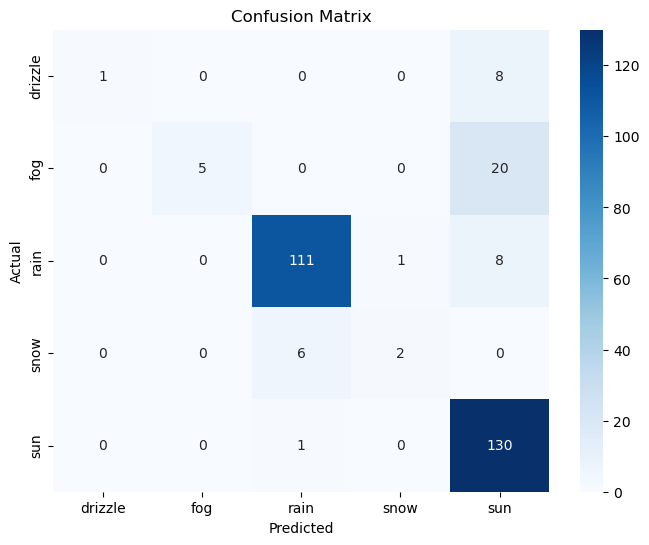

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()